# Question 1 | ME7223 - End Semester Exam
## Graphical and KKT Method
### Saarthak Marathe | ME17B162

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from sympy.solvers import solve
from sympy import Symbol

In [2]:
#roll no is ME17B162
a = 162/17
b = 6
c = 9
d = 5
e = 1

In [3]:
#defining the objective function
def f(x):
    return (x[0]-d)**2 + (x[1]-c)**2

#defining the constraint equations
def g1(x):
    return d+x**2

def g2(x):
    return e+(x-2)**2

# Graphical Method

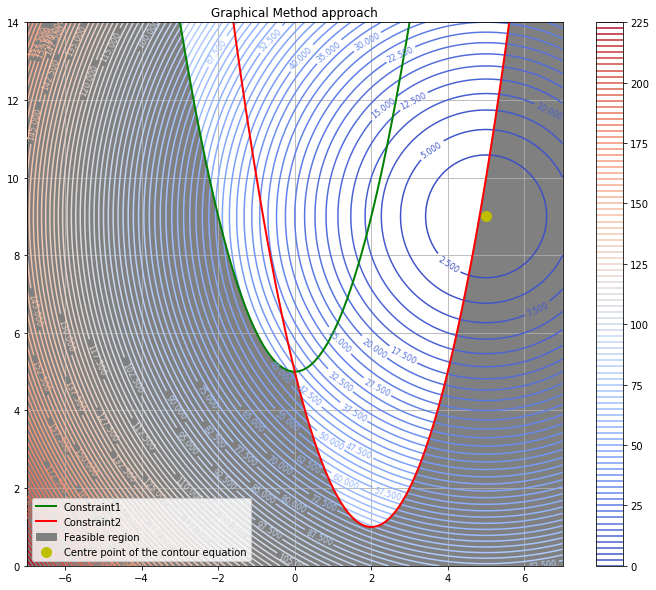

In [59]:
#defining the boundaries and mesh for the contours
xmin = -7
xmax = 7
ymin = 0
ymax = 14
x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)
xx, yy = np.meshgrid(x, y)
zz = np.array([f(a) for a in np.c_[xx.ravel(), yy.ravel()]])
zz = zz.reshape(xx.shape)

#contour plotting
plt.figure(figsize=(12, 10))
contours = plt.contour(xx, yy, zz, cmap = 'coolwarm', levels = 100) #plotting contour values
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.grid()

#plotting the constraint equations and shading the feasible region
x = np.linspace(xmin, xmax, 1000)
y1 = g1(x)
y2 = g2(x)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = min(y1[i], y2[i])
plt.fill_between(x, 0, y, color='grey', label = 'Feasible region')

plt.plot(x, y1, color='green', linestyle='-', linewidth=2, label = 'Constraint1')
plt.plot(x, y2, color='r', linestyle='-', linewidth=2, label = 'Constraint2')
plt.scatter(5,9, s=100, color = 'y', label = 'Centre point of the contour equation')

plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('Graphical Method approach')
plt.show()

The feasible shaded region is in the convex part of the parabola (outside the cup area).

Centre of the contour region has the lowest value of the objective function (which is zero)
As the centre (x1=5, x2=9) is in the feasible region, our minima is the **centre** point.

Thus, optimum point: x1=5, x2=9

# KKT Method (Calculations)

In [64]:
'''
Calculating roots of cubic equation for lambda2 values when lambda1=0 and -(x1-2)^2+x2-1=0
Equation of lambda2 (l2) is: -(l2)^3 + 18(l2)^2 - 33*l2 - 2 = 0 
'''
#calculating the solution of the above mentioned lambda2 equation
coeff = [-1, 18, -33, -2]
l2 = np.roots(coeff) #inbuild equation solver

#calculating g1, g2, f values for x1, x2 corresponding to each l2 values
def g1_cond(x):
    return -x[0]**2+x[1]-5

def g2_cond(x):
    return -(x[0]-2)**2+x[1]-1

x = [0]*2
for i in range(len(l2)):
    x[0] = (5-2*l2[i])/(1-l2[i])
    x[1] = -(l2[i]/2)+9
    if g1_cond(x)<=0 and g2_cond(x)<=0 and l2[i]>=0:
        print('Feasible value of lambda2=',l2[i],' with f(x):', f(x))
        print('x values for above are:', x)
    else:
        print('\nlambda2 value = ',l2[i],' infeasible')

Feasible value of lambda2= 15.91913036417428  with f(x): 73.60161734519403
x values for above are: [1.7989158934354523, 1.0404348179128604]

lambda2 value =  2.1395888625703603  infeasible

lambda2 value =  -0.05871922674463366  infeasible


In [63]:
'''
Calculating roots of cubic equation for lambda1 values when lambda2=0 and -(x1)^2+x2-5=0
Equation of lambda1 (l1) is: -(l1)^3 - 8(l1)^2 + 19*l1 - 42 = 0 
'''
#calculating the solution of the above mentioned lambda1 equation
coeff = [-1, -8, 19, -42]
l1 = np.roots(coeff) #inbuild equation solver
l1

array([-10.25271741+0.j        ,   1.1263587 +1.68160371j,
         1.1263587 -1.68160371j])